In [18]:
#数据信息和预处理：请概述所使用数据集的基本信息，并处理缺失值和异常值。
#实验三数据（BC2)中的目标标签为 ：二值变量diagnosis
#实验四数据（BC2）的预测变量：二值变量Class
import pandas as pd 
import scipy 

address_BC1 = r"C:\Users\86180\Desktop\数据集\data.csv"
address_BC2 = r"C:\Users\86180\Desktop\数据集\data2.csv"
# 读取csv文件  
BC1 = pd.read_csv(address_BC1)  
BC2 = pd.read_csv(address_BC2)

# 检查哪些特征含有缺失值  
missing_values = BC1.isnull().sum()  
print("Features with missing values:")  
print(missing_values[missing_values > 0])  # 只显示含有缺失值的特征  
  
# 删除所有含空缺值的行  
BC1 = BC1.dropna() 

rows1, columns1 = BC1.shape
print("实验三中数据集合的基本信息如下：")
print(f'总数据量（已删除缺失值）：{rows1}')
print(f'所有的属性：{BC1.columns}')
print(f"良性（B）的计数: {BC1['diagnosis'].value_counts().get('B', 0)},恶性（M）的计数: {BC1['diagnosis'].value_counts().get('M', 0)}") 
BC1['diagnosis'] = BC1['diagnosis'].replace({'B': 0, 'M': 1})     

# 检查哪些特征含有缺失值  
missing_values = BC2.isnull().sum()  
print("Features with missing values:")  
print(missing_values[missing_values > 0])  # 只显示含有缺失值的特征  

print('666') 
# 删除所有含空缺值的行  
BC2 = BC2.dropna()  

# 修正BC2中tumor-size、inv-nodes列中的异常值 
replacements = {
    '14-Oct':'10-14',
    '9-May':'5-9',
    '5-Mar':'3-5',
    '8-Jun':'6-8',
    '11-Sep':'9-11',
    '14-Dec':'12-14'
}
# 使用replace方法替换值  
BC2['inv-nodes'].replace(replacements, inplace=True)  
BC2['tumor-size'].replace(replacements, inplace=True) 


rows2, columns2 = BC2.shape
print("实验四中数据集合的基本信息如下：")
print(f'总数据量（已删除缺失值）：{rows2}')
print(f'所有的属性：{BC2.columns}')
print(f"复发的计数: {BC2['Class'].value_counts().get('recurrence-events', 0)},不复发的计数: {BC2['Class'].value_counts().get('no-recurrence-events', 0)}")  




Features with missing values:
smoothness_mean           1
fractal_dimension_mean    2
texture_se                2
compactness_se            1
concavity_se              1
fractal_dimension_se      1
radius_worst              1
smoothness_worst          1
dtype: int64
实验三中数据集合的基本信息如下：
总数据量（已删除缺失值）：560
所有的属性：Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
良性（B）的计数: 355,恶性（M）的计数: 205
Features with m

In [19]:
#数据集的划分
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn import svm 
from sklearn.preprocessing import StandardScaler  

# 分离特征和目标标签  
X = BC1.drop(['id', 'diagnosis'], axis=1)  # 特征  
y = BC1['diagnosis']  # 目标标签 

# 数据标准化 
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X) 

# 第一次划分：80%作为训练-验证集，20%作为测试集  
X_train_val, X_test1, y_train_val, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  
  
# 第二次划分：从训练-验证集中再划分出70%作为训练集，剩下的30%作为验证集  
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 注意这里的test_size其实是验证集的比例  
  
# 现在你有了X_train, X_val, X_test, y_train, y_val, y_test 
  
# 输出每个分片的形状以确认划分 
print("BC1的划分情况如下:") 
print("X_train1 shape:", X_train1.shape)  
print("X_val1 shape:", X_val1.shape)  
print("X_test1 shape:",X_test1.shape)



BC1的划分情况如下:
X_train1 shape: (392, 30)
X_val1 shape: (56, 30)
X_test1 shape: (112, 30)


In [20]:
#对实验三数据集进行SVM分类
# 创建SVM分类器实例（这里使用RBF核作为示例）  
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')  
  
# 训练模型  
clf.fit(X_train1, y_train1)  
  
# 预测测试集  
y_pred_test1 = clf.predict(X_test1)  
  
# 评估模型  
accuracy = accuracy_score(y_test1, y_pred_test1)  
print("SVM在实验三数据集上的Accuracy:", accuracy)
print(classification_report(y_test1,y_pred_test1))

# 初始化超参数  
C_values = [0.1, 1, 10, 100]  
gamma_values = ['scale', 0.1, 1, 10]  
best_accuracy_SVM = 0.0  
best_params_SVM= {'C': None, 'gamma': None}  

#进行手动超参数调节  
# 遍历超参数组合  
for C in C_values:  
    for gamma in gamma_values:  
        # 创建SVM分类器实例  
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)  
        params_SVM = {'C': C, 'gamma': gamma}  
        # 训练模型  
        clf.fit(X_train1, y_train1)  
          
        # 预测测试集  
        y_pred = clf.predict(X_test1)  
          
        # 评估模型  
        accuracy = accuracy_score(y_test1, y_pred)

        #输出参数和准确率
        print(f"Parameters: {params_SVM},Accuracy: {accuracy}")

        # 记录最佳模型  
        if accuracy > best_accuracy_SVM:  
            best_accuracy_SVM = accuracy  
            best_params_SVM = params_SVM
  
# 输出最佳参数和准确率  
print("Best parameters:", best_params_SVM)  
print("Best accuracy:", best_accuracy_SVM)  
  
# 使用最佳参数重新训练模型  
best_clf = svm.SVC(kernel='rbf', **best_params_SVM)  
best_clf.fit(X_train1, y_train1)  

#预测验证集
y_pred_val1 = best_clf.predict(X_val1)
# 验证集评估模型  
accuracy = accuracy_score(y_val1, y_pred_val1)  
print(f'验证集上的Accuracy: {accuracy}') 
print(classification_report(y_val1,y_pred_val1))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.98      0.94      0.96        49

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

Parameters: {'C': 0.1, 'gamma': 'scale'},Accuracy: 0.9375
Parameters: {'C': 0.1, 'gamma': 0.1},Accuracy: 0.8839285714285714
Parameters: {'C': 0.1, 'gamma': 1},Accuracy: 0.5625
Parameters: {'C': 0.1, 'gamma': 10},Accuracy: 0.5625
Parameters: {'C': 1, 'gamma': 'scale'},Accuracy: 0.9642857142857143
Parameters: {'C': 1, 'gamma': 0.1},Accuracy: 0.9553571428571429
Parameters: {'C': 1, 'gamma': 1},Accuracy: 0.5625
Parameters: {'C': 1, 'gamma': 10},Accuracy: 0.5625
Parameters: {'C': 10, 'gamma': 'scale'},Accuracy: 0.9553571428571429
Parameters: {'C': 10, 'gamma': 0.1},Accuracy: 0.9464285714285714
Parameters: {'C': 10, 'gamma': 1},Accuracy: 0.57

决策树在实验三测试集上的Accuracy: 0.9017857142857143
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.87      0.92      0.89        49

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112

Parameters: {'max_depth': 1, 'min_samples_split': 2},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 3},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 4},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 5},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 6},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 7},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 8},Accuracy: 0.8839285714285714
Parameters: {'max_depth': 1, 'min_samples_split': 9},Accur

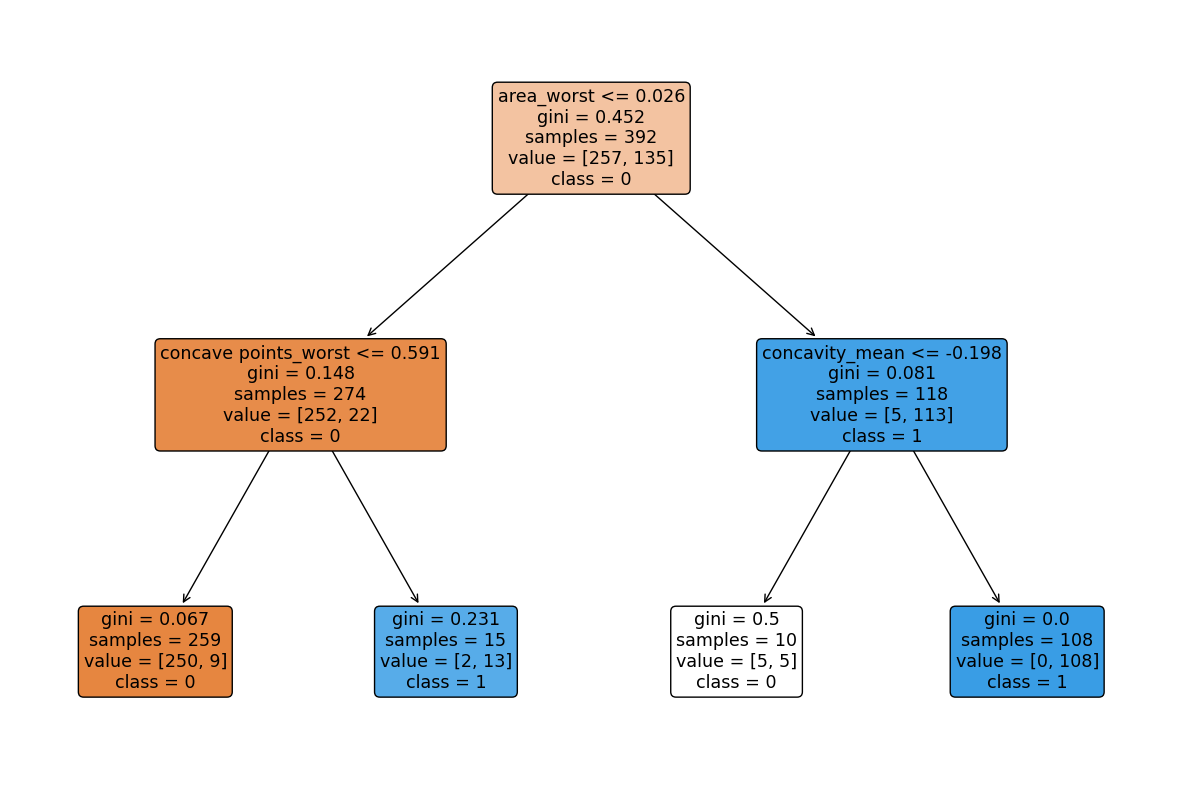

In [45]:
#BC1进行决策树分类
# 初始化决策树模型  
dtc_BC1= DecisionTreeClassifier(random_state=42)  
  
# 训练模型  
dtc_BC1.fit(X_train1, y_train1)  
  
# 预测测试集  
y_pred_test1 = dtc_BC1.predict(X_test1) 
  
# 测试集简单评估模型  
accuracy = accuracy_score(y_test1, y_pred_test1)  
print(f'决策树在实验三测试集上的Accuracy: {accuracy}') 
print(classification_report(y_test1,y_pred_test1)) 


# 定义候选超参数  
max_depth_range = range(1, 11)  # 尝试从1到10的深度  
min_samples_split_range = range(2, 11)  # 尝试从2到10的最小样本分割数  
  
# 初始化决策树分类器  
dtc = DecisionTreeClassifier()  
  
# 手动调节超参数并评估  
best_accuracy = 0.0  
best_params = None  
  
for max_depth in max_depth_range:  
    for min_samples_split in min_samples_split_range:  
        # 设置当前超参数  
        dtc.set_params(max_depth=max_depth, min_samples_split=min_samples_split)  
        params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
        # 训练模型  
        dtc.fit(X_train1, y_train1)  
          
        # 预测测试集  
        y_pred = dtc.predict(X_test1)  
          
        # 计算准确度  
        accuracy = accuracy_score(y_test1, y_pred)  

        #打印特定参数下的准确度
        print(f"Parameters: {params},Accuracy: {accuracy}")  

        # 更新最佳准确度和参数（如果当前准确度更高）  
        if accuracy > best_accuracy:  
            best_accuracy = accuracy  
            best_params =  params  
  
# 输出最佳准确度和参数  
print(f"Best Accuracy: {best_accuracy}")  
print(f"Best Parameters: {best_params}")  
  
#使用最佳参数训练最终的模型 
dtc_best_BC1 = DecisionTreeClassifier(**best_params)  
dtc_best_BC1.fit(X_train1, y_train1)

#预测验证集
y_pred_val1 = dtc_best_BC1.predict(X_val1)
# 验证集评估模型  
accuracy_val = accuracy_score(y_val1, y_pred_val1)  
print(f'决策树在实验三验证集上的Accuracy: {accuracy_val}') 
print(classification_report(y_val1,y_pred_val1)) 
#可视化决策树 


from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt  
fig, ax = plt.subplots(figsize=(15, 10))  
plot_tree(dtc_best_BC1, filled=True, feature_names=X.columns,   
          class_names=['0', '1'], rounded=True, ax=ax)  
          #class_names=['Class=no-recurrence-events', 'Class=recurrence-events'], rounded=True, ax=ax)  
plt.show()

In [22]:
#BC2,是否复发乳腺癌问题的预测 数据预处理部分，转换为数字索引
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  

#数据预处理，把文本准换成为数字 
# 读取包含特征映射的Excel文件  
mapping_df = pd.read_excel('C:\\Users\\86180\\Desktop\\数据集\\variables.xlsx') 
# 初始化索引与属性值的对应关系字典  
ind2val = {} 

# 遍历映射DataFrame，为每个特征创建映射关系  
flag = 0
for index, row in mapping_df.iterrows():  
    feature_name = row['Variable Name']  #这一列包含了特征名  
    value_to_index_pairs = row['Description'].split(',')  # 映射之间用逗号分隔    
  
 # 遍历每个值到索引的配对  
    for pair in value_to_index_pairs:  
        pair= pair.strip()  
        # 创建特征名和具体值的组合作为字典的键  
        key = f'{feature_name}={pair}'  
          
        # 添加映射到ind2val字典  
        ind2val[key] = flag 
        flag = flag+1
  
print(ind2val) 

# 遍历数据集的每一列  
for column in BC2.columns:  
    # 检查该列是否在映射字典的特征名中  
    for key, value in ind2val.items():  
        feature_name, feature_value = key.split('=')  
        if column == feature_name:  
            # 替换该列中的值为字典中对应的索引  
            BC2[column] = BC2[column].replace(feature_value, value)  
print(BC2.head())

#转换之后进行数据分片
BC2 = BC2.sample(frac=1).reset_index(drop=True) 

total2 = len(BC2)  
train2 = int(total2 * 0.7)  
val2= int(total2 * 0.1)  
test2 =  int(total2 * 0.2)  
  
# 使用iloc进行索引切片  
train_BC2 = BC2.iloc[:train2]  
val_BC2 = BC2.iloc[train2:train2+val2]  
test_BC2 = BC2.iloc[train2+val2:]  
  
# 输出每个分片的形状以确认划分 
print('\n')
print("BC2的划分情况如下:")  
print("train_BC2 shape:", train_BC2.shape)  
print("validation_BC2 shape:", val_BC2.shape)  
print("test_BC2 shape:", test_BC2.shape)



{'Class=no-recurrence-events': 0, 'Class=recurrence-events': 1, 'age=10-19': 2, 'age=20-29': 3, 'age=30-39': 4, 'age=40-49': 5, 'age=50-59': 6, 'age=60-69': 7, 'age=70-79': 8, 'age=80-89': 9, 'age=90-99': 10, 'menopause=lt40': 11, 'menopause=ge40': 12, 'menopause=premeno': 13, 'tumor-size=0-4': 14, 'tumor-size=5-9': 15, 'tumor-size=10-14': 16, 'tumor-size=15-19': 17, 'tumor-size=20-24': 18, 'tumor-size=25-29': 19, 'tumor-size=30-34': 20, 'tumor-size=35-39': 21, 'tumor-size=40-44': 22, 'tumor-size=45-49': 23, 'tumor-size=50-54': 24, 'tumor-size=55-59': 25, 'inv-nodes=0-2': 26, 'inv-nodes=3-5': 27, 'inv-nodes=6-8': 28, 'inv-nodes=9-11': 29, 'inv-nodes=12-14': 30, 'inv-nodes=15-17': 31, 'inv-nodes=18-20': 32, 'inv-nodes=21-23': 33, 'inv-nodes=24-26': 34, 'inv-nodes=27-29': 35, 'inv-nodes=30-32': 36, 'inv-nodes=33-35': 37, 'inv-nodes=36-39': 38, 'node-caps=yes': 39, 'node-caps=no': 40, 'deg-malig=1': 41, 'deg-malig=2': 42, 'deg-malig=3': 43, 'breast=left': 44, 'breast=right': 45, 'breast-q

测试集上的Accuracy: 0.7192982456140351
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        40
           1       0.52      0.65      0.58        17

    accuracy                           0.72        57
   macro avg       0.68      0.70      0.68        57
weighted avg       0.74      0.72      0.73        57

Parameters: {'max_depth': 1, 'min_samples_split': 2},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 3},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 4},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 5},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 6},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 7},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 8},Accuracy: 0.7192982456140351
Parameters: {'max_depth': 1, 'min_samples_split': 9},Accuracy: 0.

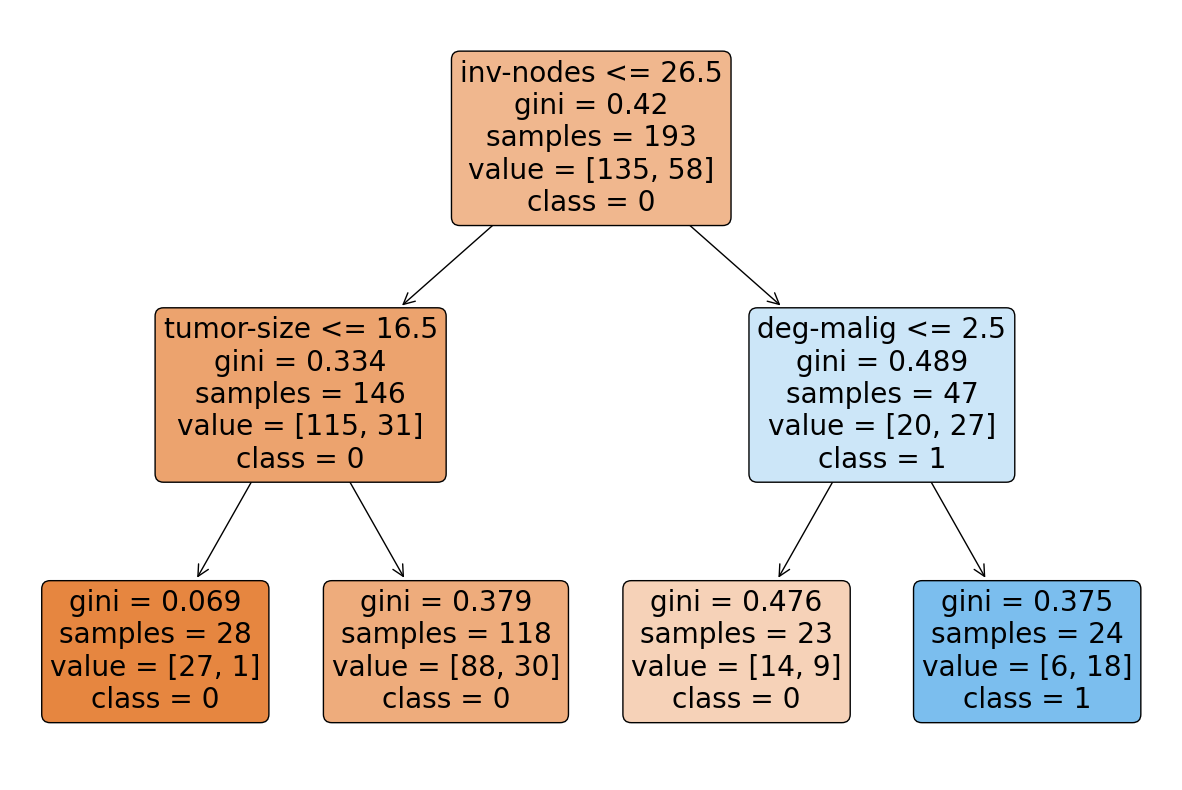

In [36]:
from sklearn.metrics import classification_report  
#BC2选择使用决策树模型 
# 选择特征列和标签列  
#.drop(['id', 'Class'], axis=1)
X_train2 = train_BC2.drop(['id', 'Class'], axis=1) 
#print(X_train2.head())
y_train2 = train_BC2['Class']  

X_test2 = test_BC2.drop(['id', 'Class'], axis=1)
y_test2 = test_BC2['Class']

X_val2= val_BC2.drop(['id', 'Class'], axis=1)
y_val2 = val_BC2['Class']

# 初始化决策树模型  
dtc= DecisionTreeClassifier(random_state=42)  
  
# 训练模型  
dtc.fit(X_train2, y_train2)  
  
# 预测测试集  
y_pred_test2 = dtc.predict(X_test2) 
  
# 测试集简单评估模型  
accuracy = accuracy_score(y_test2, y_pred_test2)  
print(f'测试集上的Accuracy: {accuracy}') 
print(classification_report(y_test2,y_pred_test2)) 


# 定义候选超参数  
max_depth_range = range(1, 11)  # 尝试从1到10的深度  
min_samples_split_range = range(2, 11)  # 尝试从2到10的最小样本分割数  
  
# 初始化决策树分类器  
dtc = DecisionTreeClassifier()  
  
# 手动调节超参数并评估  
best_accuracy = 0.0  
best_params = None  
  
for max_depth in max_depth_range:  
    for min_samples_split in min_samples_split_range:  
        # 设置当前超参数  
        dtc.set_params(max_depth=max_depth, min_samples_split=min_samples_split)  
        params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
        # 训练模型  
        dtc.fit(X_train2, y_train2)  
          
        # 预测测试集  
        y_pred = dtc.predict(X_test2)  
          
        # 计算准确度  
        accuracy = accuracy_score(y_test2, y_pred)  

        #打印特定参数下的准确度
        print(f"Parameters: {params},Accuracy: {accuracy}")  

        # 更新最佳准确度和参数（如果当前准确度更高）  
        if accuracy > best_accuracy:  
            best_accuracy = accuracy  
            best_params =  params  
  
# 输出最佳准确度和参数  
print(f"Best Accuracy: {best_accuracy}")  
print(f"Best Parameters: {best_params}")  
  
#使用最佳参数训练最终的模型 
dtc_best = DecisionTreeClassifier(**best_params)  
dtc_best.fit(X_train2, y_train2)

#预测验证集
y_pred_val2 = dtc_best.predict(X_val2)
# 验证集评估模型  
accuracy_val = accuracy_score(y_val2, y_pred_val2)  
print(f'验证集上的Accuracy: {accuracy_val}') 
print(classification_report(y_val2,y_pred_val2)) 
#可视化决策树 

from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt  
fig, ax = plt.subplots(figsize=(15, 10))  
plot_tree(dtc_best, filled=True, feature_names=X_test2.columns,   
          class_names=['0', '1'], rounded=True, ax=ax)  
          #class_names=['Class=no-recurrence-events', 'Class=recurrence-events'], rounded=True, ax=ax)  
plt.show()

In [42]:
#对BC2数据集进行SVM分析
# 创建SVM分类器实例（这里使用RBF核作为示例）  
clf_BC2 = svm.SVC(kernel='rbf', C=1, gamma='scale')  
  
# 训练模型  
clf_BC2.fit(X_train2, y_train2)  
  
# 预测测试集  
y_pred_test2 = clf_BC2.predict(X_test2)  
  
# 评估模型  
accuracy = accuracy_score(y_test2, y_pred_test2)  
print("SVM在实验四数据集上的Accuracy:", accuracy)
print(classification_report(y_test2,y_pred_test2))

# 初始化超参数  
C_values = [0.1,1,2,3,10, 100]  
gamma_values = ['scale', 0.1, 1, 10]  
best_accuracy_SVM = 0.0  
best_params_SVM= {'C': None, 'gamma': None}  

#进行手动超参数调节  
# 遍历超参数组合  
for C in C_values:  
    for gamma in gamma_values:  
        # 创建SVM分类器实例  
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)  
        params_SVM = {'C': C, 'gamma': gamma}  
        # 训练模型  
        clf.fit(X_train2, y_train2)  
          
        # 预测测试集  
        y_pred = clf.predict(X_test2)  
          
        # 评估模型  
        accuracy = accuracy_score(y_test2, y_pred)

        #输出参数和准确率
        print(f"Parameters: {params_SVM},Accuracy: {accuracy}")

        # 记录最佳模型  
        if accuracy > best_accuracy_SVM:  
            best_accuracy_SVM = accuracy  
            best_params_SVM = params_SVM
  
# 输出最佳参数和准确率  
print("Best parameters:", best_params_SVM)  
print("Best accuracy:", best_accuracy_SVM)  
  
# 使用最佳参数重新训练模型  
best_clf_BC2 = svm.SVC(kernel='rbf', **best_params_SVM)  
best_clf_BC2.fit(X_train2, y_train2)  

#预测验证集
y_pred_val2 = best_clf_BC2.predict(X_val2)
# 验证集评估模型  
accuracy = accuracy_score(y_val2, y_pred_val2)  
print(f'验证集上的Accuracy: {accuracy}') 
print(classification_report(y_val2,y_pred_val2))

SVM在实验四数据集上的Accuracy: 0.7017543859649122
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        40
           1       0.00      0.00      0.00        17

    accuracy                           0.70        57
   macro avg       0.35      0.50      0.41        57
weighted avg       0.49      0.70      0.58        57

Parameters: {'C': 0.1, 'gamma': 'scale'},Accuracy: 0.7017543859649122
Parameters: {'C': 0.1, 'gamma': 0.1},Accuracy: 0.7017543859649122
Parameters: {'C': 0.1, 'gamma': 1},Accuracy: 0.7017543859649122
Parameters: {'C': 0.1, 'gamma': 10},Accuracy: 0.7017543859649122
Parameters: {'C': 1, 'gamma': 'scale'},Accuracy: 0.7017543859649122
Parameters: {'C': 1, 'gamma': 0.1},Accuracy: 0.7368421052631579
Parameters: {'C': 1, 'gamma': 1},Accuracy: 0.7368421052631579
Parameters: {'C': 1, 'gamma': 10},Accuracy: 0.7368421052631579
Parameters: {'C': 2, 'gamma': 'scale'},Accuracy: 0.7017543859649122
Parameters: {'C': 2, 'gamma': 0.1},Accurac

c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
#贝叶斯分类器应用在实验四的数据集上
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score 
# 创建并训练模型  
gnb =  MultinomialNB()  
gnb.fit(X_train2, y_train2)  
  
# 预测测试集  
y_pred = gnb.predict(X_test2)  
  
# 计算准确率  
print("贝叶斯分类器在实验四测试集上的Accuracy:", accuracy_score(y_test2, y_pred))

best_accuracy = 0.0
best_alpha = None



parameter_grid = {'alpha': [0.1,1,10]}  # 拉普拉斯平滑参数alpha
for alpha in parameter_grid['alpha']:   
    # 创建朴素贝叶斯分类器实例  
    gnb =  MultinomialNB(alpha = alpha)    
    # 训练模型  
    gnb.fit(X_train2, y_train2)  
        
    # 预测测试集  
    y_pred = gnb.predict(X_test2)  
        
    # 评估模型  
    accuracy = accuracy_score(y_test2, y_pred)

    #输出参数和准确率
    print(f"Parameters: {alpha},Accuracy: {accuracy}")

    # 记录最佳模型  
    if accuracy > best_accuracy:  
        best_accuracy = accuracy  
        best_alpha = alpha
  
# 输出最佳参数和准确率  
print("Best parameters:", best_alpha)  
print("Best accuracy:", best_accuracy)  
  
# 使用最佳参数重新训练模型  
best_gnb =  MultinomialNB (alpha = best_alpha)
best_gnb.fit(X_train2, y_train2)  

#预测验证集
y_pred_val2 =best_gnb.predict(X_val2)
# 验证集评估模型  
accuracy = accuracy_score(y_val2, y_pred_val2)  
print(f'贝叶斯分类器在实验四验证集上的Accuracy: {accuracy}') 
print(classification_report(y_val2,y_pred_val2))

贝叶斯分类器在实验四测试集上的Accuracy: 0.7017543859649122
Parameters: 0.1,Accuracy: 0.7017543859649122
Parameters: 1,Accuracy: 0.7017543859649122
Parameters: 10,Accuracy: 0.7017543859649122
Best parameters: 0.1
Best accuracy: 0.7017543859649122
贝叶斯分类器在实验四验证集上的Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       0.00      0.00      0.00         6

    accuracy                           0.78        27
   macro avg       0.39      0.50      0.44        27
weighted avg       0.60      0.78      0.68        27



c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\86180\miniconda3\envs\python_3.8\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
